In [1]:
import glob
import numpy as np
import pandas as pd
from root_numpy import root2array

GeV = 1000

In [2]:
def flatten(column):
    try:
        return np.array([var for entry in column for var in entry])
    except (TypeError, ValueError):
        return column

In [3]:
def applyCuts(f):
    nf = f[
        #Nicole's jet cuts
        (f.jet_pt > 20*GeV) &

        (abs(f.jet_eta) < 2.5) &
        ( (f.jet_pt > 60*GeV) | (abs(f.jet_eta) > 2.4) | (f.jet_JVT > 0.59) ) &

        #Muon cuts
        (f.jet_mu_pt > 1*GeV) &
        (abs(f.jet_mu_eta) < 2.5) &
        
        #Remove rows with no track information
        (f.jet_trk_eta.map(lambda d: len(d)) > 0)
    ].copy()

    return nf

In [4]:
branchNames = [
    "jet_LabDr_HadF", 
    "jet_pt", "jet_eta", "jet_phi",
    "jet_pt_orig", "jet_eta_orig", "jet_phi_orig",
    "jet_JVT", 
    "jet_aliveAfterOR", "jet_aliveAfterORmu", 
    "jet_mu_smt",
    "jet_mu_pt", "jet_mu_eta", "jet_mu_phi",
    "jet_mu_pTrel", "jet_mu_dR",
    "jet_mu_d0", "jet_mu_z0",
    "jet_mu_parent_pdgid",
    "jet_mu_qOverPratio",
    "jet_trk_pt", "jet_trk_eta", "jet_trk_phi",
    "jet_trk_ip3d_d0", "jet_trk_ip3d_z0", "jet_trk_ip3d_d0sig", "jet_trk_ip3d_z0sig",
    "jet_trk_pdg_id", "jet_trk_barcode", "jet_trk_parent_pdgid"
]

In [5]:
files = glob.glob("/gpfs/slac/atlas/fs1/d/rafaeltl/public/RNNIP/FTAG_ntups/user.rateixei.mc16_13TeV.410470.PhPy8EG_A14_ttbar_hdamp258p75_nonallhad.AOD.16Jul2018.ttb20180629_Akt4EMTo/*.root")
data = root2array(files[0], branches=branchNames)
print "Added ntuple #1"

for f in range(1,len(files[:10])):
    data = np.hstack((data,root2array(files[f], branches=branchNames)))
    print "Added ntuple #{}".format(f+1)

Added ntuple #1
Added ntuple #2
Added ntuple #3
Added ntuple #4
Added ntuple #5
Added ntuple #6
Added ntuple #7
Added ntuple #8
Added ntuple #9
Added ntuple #10


In [6]:
df = pd.DataFrame(data)

In [7]:
df = pd.DataFrame({k: flatten(c) for k, c in df.iteritems()})

In [8]:
df = applyCuts(df)

In [9]:
df["jet_mutrk_deltaR"] = pd.Series([ np.sqrt(np.power((row.jet_mu_eta - np.array(row.jet_trk_eta)),2) + 
                                             np.power((row.jet_mu_phi - np.array(row.jet_trk_phi)),2) ) 
                                             for row in df[["jet_mu_eta", "jet_trk_eta", 
                                                            "jet_mu_phi", "jet_trk_phi"]].itertuples() ],
                                             index = df.index) 

In [10]:
df["jet_mutrk_pdg_id"]       = pd.Series([ np.array(row.jet_trk_pdg_id)[np.argmin(np.array(row.jet_mutrk_deltaR))]
                                           for row in df[["jet_trk_pdg_id", "jet_mutrk_deltaR"]].itertuples() ],
                                           index = df.index)

df["jet_mutrk_pt"]           = pd.Series([ np.array(row.jet_trk_pt)[np.argmin(np.array(row.jet_mutrk_deltaR))]
                                           for row in df[["jet_trk_pt", "jet_mutrk_deltaR"]].itertuples() ],
                                           index = df.index)

df["jet_mutrk_eta"]          = pd.Series([ np.array(row.jet_trk_eta)[np.argmin(np.array(row.jet_mutrk_deltaR))]
                                           for row in df[["jet_trk_eta", "jet_mutrk_deltaR"]].itertuples() ],
                                           index = df.index)

df["jet_mutrk_phi"]          = pd.Series([ np.array(row.jet_trk_phi)[np.argmin(np.array(row.jet_mutrk_deltaR))]
                                           for row in df[["jet_trk_phi", "jet_mutrk_deltaR"]].itertuples() ],
                                           index = df.index)

df["jet_mutrk_ip3d_d0"]      = pd.Series([ np.array(row.jet_trk_ip3d_d0)[np.argmin(np.array(row.jet_mutrk_deltaR))]
                                           for row in df[["jet_trk_ip3d_d0", "jet_mutrk_deltaR"]].itertuples() ],
                                           index = df.index)

df["jet_mutrk_ip3d_z0"]      = pd.Series([ np.array(row.jet_trk_ip3d_z0)[np.argmin(np.array(row.jet_mutrk_deltaR))]
                                           for row in df[["jet_trk_ip3d_z0", "jet_mutrk_deltaR"]].itertuples() ],
                                           index = df.index)

df["jet_mutrk_ip3d_d0sig"]   = pd.Series([ np.array(row.jet_trk_ip3d_d0sig)[np.argmin(np.array(row.jet_mutrk_deltaR))]
                                           for row in df[["jet_trk_ip3d_d0sig", "jet_mutrk_deltaR"]].itertuples() ],
                                           index = df.index)

df["jet_mutrk_ip3d_z0sig"]   = pd.Series([ np.array(row.jet_trk_ip3d_z0sig)[np.argmin(np.array(row.jet_mutrk_deltaR))]
                                           for row in df[["jet_trk_ip3d_z0sig", "jet_mutrk_deltaR"]].itertuples() ],
                                           index = df.index)

df["jet_mutrk_barcode"]      = pd.Series([ np.array(row.jet_trk_barcode)[np.argmin(np.array(row.jet_mutrk_deltaR))]
                                           for row in df[["jet_trk_barcode", "jet_mutrk_deltaR"]].itertuples() ],
                                           index = df.index)

df["jet_mutrk_parent_pdgid"] = pd.Series([ np.array(row.jet_trk_parent_pdgid)[np.argmin(np.array(row.jet_mutrk_deltaR))]
                                           for row in df[["jet_trk_parent_pdgid", "jet_mutrk_deltaR"]].itertuples() ],
                                           index = df.index)

In [11]:
df.head()

,jet_JVT,jet_LabDr_HadF,jet_aliveAfterOR,jet_aliveAfterORmu,jet_eta,jet_eta_orig,jet_mu_d0,jet_mu_dR,jet_mu_eta,jet_mu_pTrel,...,jet_mutrk_pdg_id,jet_mutrk_pt,jet_mutrk_eta,jet_mutrk_phi,jet_mutrk_ip3d_d0,jet_mutrk_ip3d_z0,jet_mutrk_ip3d_d0sig,jet_mutrk_ip3d_z0sig,jet_mutrk_barcode,jet_mutrk_parent_pdgid
2,0.996048,5,1,1,-2.194354,-2.194509,-0.008981,0.096337,-2.099380,7021.542969,...,211,3068.633545,-2.099381,2.395592,0.017561,0.219127,0.356988,3.969574,10034,2224
90,0.978201,5,1,1,-1.034404,-1.033898,-0.203475,0.254856,-0.871578,9841.053711,...,13,7950.973145,-0.871548,1.470031,0.208700,0.341595,11.011349,8.086005,10010,-511
115,0.979510,5,1,1,-1.353247,-1.354269,0.077694,0.052125,-1.327179,3722.611816,...,13,10404.145508,-1.327188,3.083046,-0.060307,0.087853,-3.131548,2.319084,10038,-411
140,1.000000,5,1,1,1.187985,1.187936,0.035518,0.054772,1.184054,2190.663330,...,-13,59710.191406,1.184082,0.448695,0.017883,-0.006945,1.907260,-0.233567,10039,521
154,1.000000,5,1,1,-1.101763,-1.100742,0.113934,0.130581,-1.133246,2890.422363,...,13,31276.175781,-1.133188,1.985358,0.119455,0.043936,9.251494,1.213811,10013,-521


In [12]:
from collections import OrderedDict

def MuonInfo(f, jetType):
    if jetType==0:
        print "Information about light jets: \n"
    elif jetType==4:
        print "Information about c jets: \n"
    elif jetType==5:
        print "Information about b jets: \n"
    elif jetType==15:
        print "Information about tau jets: \n"
        
    jetType_df = f[ f.jet_LabDr_HadF==jetType ].copy()
        
    muonPdgids = OrderedDict()
    muonPdgids['13'] = {"pdgid":13, "count":0}
    print "Pdgids of tracks matched with 'jet_mu' variables:"
    for i, v in enumerate(jetType_df["jet_mutrk_pdg_id"]):
        pdgid = int(abs(v))
        if str(pdgid) not in muonPdgids:
            muonPdgids[str(pdgid)] = {"pdgid":pdgid, "count":1}
        else:
            muonPdgids[str(pdgid)]["count"] +=1
            
    for muonType in muonPdgids:
        print "'{}' count = {}".format(muonPdgids[muonType]["pdgid"], muonPdgids[muonType]["count"])
        
    print "\n"
        
    print "Total # of muons:    {}".format(len(jetType_df["jet_mutrk_pdg_id"][abs(jetType_df["jet_mutrk_pdg_id"]) == 13]))
    print "Total # of nonmuons: {}".format(len(jetType_df["jet_mutrk_pdg_id"][abs(jetType_df["jet_mutrk_pdg_id"]) != 13]))
    
    print "\n"
    
    print "Muons w/ barcode >  100000: {}".format(len(jetType_df["jet_mutrk_barcode"][(abs(jetType_df["jet_mutrk_pdg_id"]) == 13) & 
                                                                                 (jetType_df["jet_mutrk_barcode"] > 100000)]))
    print "Muons w/ barcode <= 100000: {}".format(len(jetType_df["jet_mutrk_barcode"][(abs(jetType_df["jet_mutrk_pdg_id"]) == 13) & 
                                                                                 (jetType_df["jet_mutrk_barcode"] <= 100000)]))

In [13]:
MuonInfo(df, 5)

Information about b jets: 

Pdgids of tracks matched with 'jet_mu' variables:
'13' count = 87760
'211' count = 8723
'999' count = 3888
'321' count = 2946
'2212' count = 327
'11' count = 363
'3112' count = 12
'3222' count = 3
'3312' count = 5


Total # of muons:    87760
Total # of nonmuons: 16267


Muons w/ barcode >  100000: 319
Muons w/ barcode <= 100000: 87441


In [14]:
from util import *
from plot import *

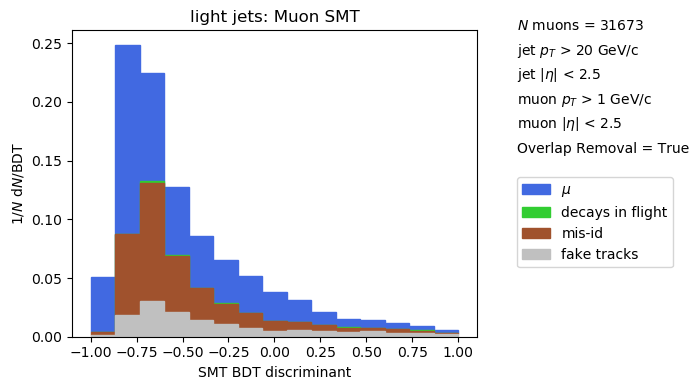

In [15]:
lightJetPlots = makePlots(df, "light jets")
printPlots(lightJetPlots)

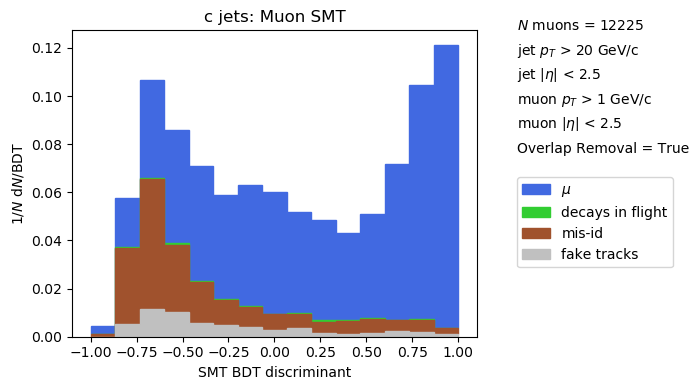

In [16]:
cJetPlots = makePlots(df, "c jets")
printPlots(cJetPlots)

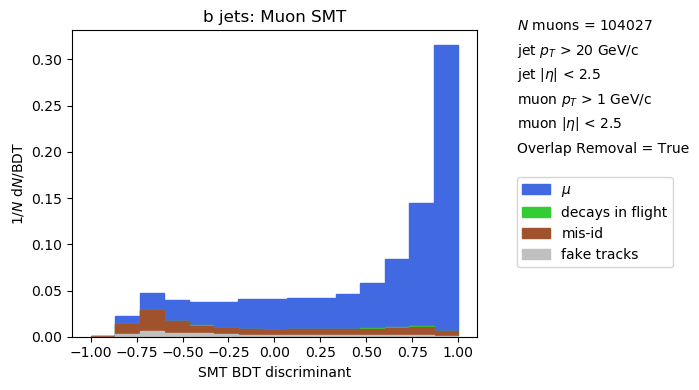

In [17]:
bJetPlots = makePlots(df, "b jets")
printPlots(bJetPlots)